ASSIGNMENT-7

ENSEMBLE TECHNIQUES


**Question No1:** Can we use Bagging for regression problems?

**Answer:**

 Yes, Bagging (Bootstrap Aggregating) can be used for regression problems. In fact, it's one of the key techniques used to improve the performance of regression models, especially when dealing with high variance or noisy data.

How Bagging Works for Regression:

Bootstrapping: Multiple subsets of the original training data are created by sampling with replacement. These subsets will have the same number of data points as the original training set, but some data points may be repeated, and others may be left out.

Training: A regression model (e.g., decision trees) is trained on each of these subsets. Each model may learn slightly different patterns due to the different data points in its subset.

Aggregation: After all the individual regression models are trained, their predictions are combined. For regression, the typical aggregation method is to average the predictions of all the models.

**Question No2:** What is the difference between multiple model training and single model training?

**Answer:**

The key difference between multiple model training and single model training lies in the number of models used to make predictions, how they are trained, and how their outputs are combined. Here’s a breakdown of the differences:

1. Single Model Training:

Definition: A single model is trained on the entire training dataset, and that one model is used for making predictions.
Training Process: You train one model using the full set of data (e.g., one decision tree, linear regression model, etc.), which tries to learn the patterns or relationships in the data.

Prediction: Once the model is trained, it predicts based on the learned parameters (weights, decision rules, etc.).

Example: Linear regression, decision trees, support vector machines (SVM), or a single deep learning model.

Advantages:

Simplicity: Only one model to train and deploy.
Faster inference: Since only one model is used, predictions are quick.

Disadvantages:

Overfitting: A single model can overfit the data, especially if the data is noisy or has high variance.
Bias: A single model might not be flexible enough to capture complex patterns.

2. Multiple Model Training:

Definition: Multiple models are trained, and their predictions are combined in some way to make the final prediction. This is often used in ensemble learning techniques.
Training Process: Different models are trained on the same or different subsets of the data, or trained with different hyperparameters. Examples include Bagging, Boosting, and Stacking.

Prediction: The outputs of the multiple models are combined through methods like voting (classification) or averaging (regression), or more complex methods like weighted voting.

Example: Random Forest (Bagging with decision trees), Gradient Boosting Machines (GBM), or ensemble models where multiple base learners are combined.

Advantages:

Reduced Variance: With techniques like Bagging, combining multiple models reduces the variance, making the predictions more robust (less prone to overfitting).

Improved Accuracy: Ensemble methods often outperform individual models by combining the strengths of multiple models, especially when different models have complementary strengths and weaknesses.

Reduced Bias: Some methods like Boosting can help reduce the bias of weak models by focusing on hard-to-predict cases.

Disadvantages:

Increased Complexity: More models to train and tune. This can lead to higher computational costs and more complex deployments.

Slower Inference: Since multiple models are used, the prediction phase can be slower than a single model, as you have to run multiple models for each input.

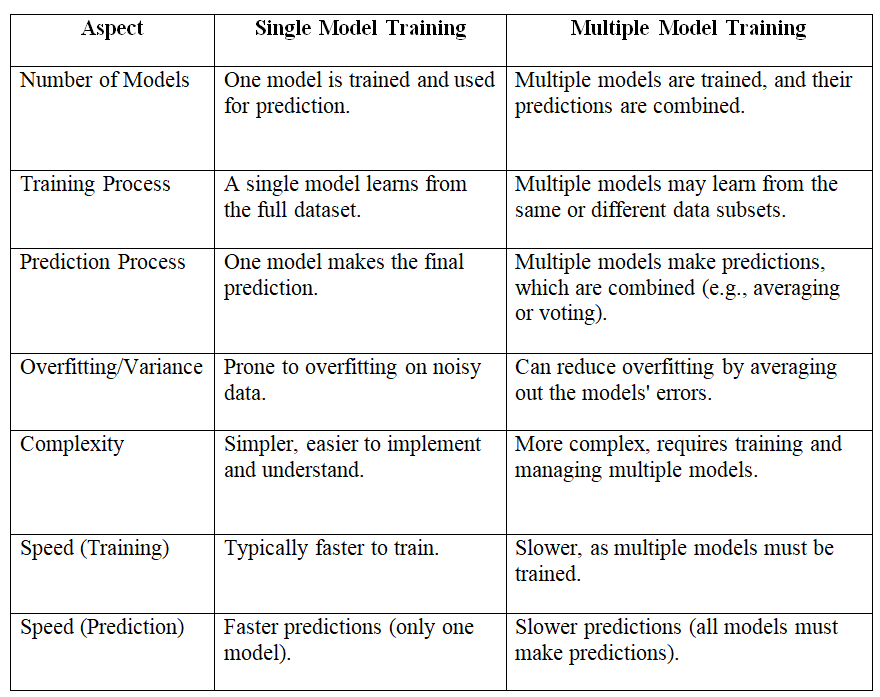

**Question No3:** Explain the concept of feature randomness in Random Forest?

**Answer:**

Feature randomness in Random Forest is a technique used to improve the diversity of the individual decision trees in the forest and reduce correlation between them. It helps make the ensemble model more robust, reduces overfitting, and improves generalization.

How Feature Randomness Works in Random Forest:

In a Random Forest, when training each individual decision tree, we introduce randomness not only by using different bootstrap samples (samples with replacement from the training set) but also by introducing randomness into the selection of features (or predictors) for each split in the decision tree.

Here's how feature randomness works during the training of each decision tree:

Selecting Random Subsets of Features: When growing each decision tree in the forest, at each node (where the decision is made to split the data), only a random subset of features is considered for that particular split, rather than using all the available features.

This means that if there are
m features in the dataset, only a smaller subset m subset of features (usually the square root of m for classification or a fraction of m for regression) will be randomly selected and evaluated at each node.
Making the Split: From the randomly chosen subset of features, the best feature (the one that maximizes the decision criterion, like Gini impurity or information gain) is selected to split the data at that node.

Repeat for All Nodes: This process of selecting a random subset of features at each node is repeated for every node in the tree, and the tree is built using this random subset of features at each decision point.

Ensemble of Trees: Once all the decision trees in the forest are trained (each with different subsets of features at each node), the Random Forest model aggregates the predictions from all the trees, typically by averaging for regression or majority voting for classification.

Why Feature Randomness Is Important:

Reduces Overfitting: By using only a subset of features at each split, the trees become less likely to overfit to specific features or noise in the data. If all trees used the same features for each split, they would likely make similar splits, leading to highly correlated trees, which reduces the overall benefit of having an ensemble of trees. Feature randomness helps to ensure that the trees are less correlated and thus more diverse, leading to better generalization on unseen data.

Improves Model Robustness: With more diversity in the trees, Random Forest can better handle a variety of patterns in the data. Trees might focus on different subsets of features, so if some features are irrelevant or noisy, their impact on the model is minimized.

Increased Computational Efficiency: When fewer features are considered at each split, the training process can be faster. The number of possible splits is reduced, leading to a decrease in computation time for each tree.

Key Parameters Related to Feature Randomness:

max_features: This is the hyperparameter that controls the number of features to consider when looking for the best split.
For classification, it is typically set to the square root of the total number of features (sqrt(n_features)).
For regression, it is often set to the total number of features divided by three (n_features / 3).
You can also set this parameter to a custom number or as a percentage of the total features.

Example:
Consider a dataset with 100 features. When training a decision tree, if we set max_features to 10, at each node of the tree, the algorithm will randomly select 10 features from the total 100 features to decide which feature to split on. This random subset of features will vary across different nodes and trees, ensuring diversity in how the trees are built.

Visual Representation:
Without feature randomness: Each decision tree might use the same features at every node, leading to similar decision boundaries and correlated trees.
With feature randomness: Each tree is built with different feature subsets at each node, creating more varied decision boundaries and making the ensemble stronger.


**Question No4:** What is OOB (Out-of-Bag) Score?

**Answer:**

The Out-of-Bag (OOB) score is a method used in Random Forests (and other ensemble learning techniques like Bagging) to estimate the performance of the model without the need for a separate validation or test set. It leverages the concept of bootstrapping, which is an essential part of Random Forests.

How OOB Score Works:

When training a Random Forest model, the training set is split into multiple bootstrap samples. A bootstrap sample is created by randomly selecting data points from the training set with replacement, meaning some data points are repeated while others are left out.

For each individual decision tree in the forest, only a portion of the data (the bootstrap sample) is used to train the tree. The data points not included in the bootstrap sample (i.e., those that are left out) are called Out-of-Bag samples for that particular tree.

Steps to Calculate OOB Score:

Train Decision Trees: For each tree in the Random Forest, create a bootstrap sample from the original training data. This sample is used to train the tree, while the data points not included in the sample are the OOB data points for that tree.

Make Predictions for OOB Data: For each data point, gather the predictions from all the trees where the point was "OOB" (i.e., the point was not included in the bootstrap sample for that tree).

Combine Predictions: The OOB prediction for a data point is obtained by combining the predictions of all the trees where the data point was OOB. Typically, this means taking the majority vote (for classification) or averaging the predictions (for regression).

Calculate OOB Error: After the predictions are made, compare the OOB predictions to the actual labels of the data points to compute the OOB error. The OOB error is calculated similarly to how a validation error is computed on a separate test set.

For Classification: The OOB error is calculated as the proportion of incorrectly classified data points.
For Regression: The OOB error is calculated as the mean squared error (MSE) or another suitable metric for the regression task.

Why is the OOB Score Useful?

No Need for a Separate Validation Set: OOB provides a way to estimate the model's performance without needing a separate validation or test set, which is particularly useful when data is limited.

Efficient Use of Data: Each data point is used for both training (in some trees) and testing (in the OOB samples of the trees where it wasn't included). This means that all the data is used for both training and validation.

Bias-Corrected Estimate: Since each data point is left out of the bootstrap sample of some trees, the OOB score provides a more unbiased performance estimate than a single validation set because it's an out-of-sample error for each data point.

Model Tuning: The OOB score is particularly useful for hyperparameter tuning, such as choosing the number of trees in the forest or setting other parameters like the maximum depth of trees.

**Question No5:** How can you measure the importance of features in a Random Forest model?

**Answer:**

In a Random Forest model, measuring the importance of features helps identify which features contribute the most to making accurate predictions. This can be useful for feature selection, improving model interpretability, and understanding the underlying patterns in the data. Random Forest provides several methods to assess feature importance, and the two most common ones are:

1. Mean Decrease Impurity (Gini Importance):

This method measures the importance of each feature based on how much it contributes to reducing the impurity (or disorder) in the decision trees.

How it works:

During the construction of each tree in the Random Forest, the algorithm splits the data at each node based on the features. The quality of each split is measured by an impurity measure (e.g., Gini Impurity for classification or Mean Squared Error for regression).
Each feature that is used to make a split contributes to reducing the impurity. The more a feature reduces impurity across all trees in the forest, the more important it is considered.
Mean Decrease Impurity is calculated by aggregating the total reduction in impurity across all splits in which a feature was used. The more often a feature is used to make decisions that reduce impurity, the higher its importance score.

Advantages:

Simple and fast to compute.
Works well for both classification and regression tasks.
Directly built into the Random Forest algorithm and doesn’t require extra steps.

Disadvantages:

Can be biased toward features with many levels (e.g., categorical features with many unique values), as they may appear more often in splits due to their ability to partition the data finely.

2. Mean Decrease Accuracy (Permutation Importance):

This method evaluates feature importance based on how much the model's accuracy decreases when the values of a given feature are randomly permuted (shuffled).

How it works:

After the Random Forest model has been trained, the performance (e.g., accuracy for classification or mean squared error for regression) is evaluated on the test set or using cross-validation.
For each feature, the values in that feature column are randomly shuffled, breaking any relationship between that feature and the target variable.
The model is then evaluated again on the shuffled data. The change in the model’s performance (decrease in accuracy) due to the shuffling of that feature indicates its importance.
Features that, when shuffled, cause a large drop in accuracy are deemed more important.

Advantages:

Does not depend on the specific method used for splitting nodes (like Gini impurity), so it can be used with any machine learning model.
Works well when there are correlations between features.

Disadvantages:

Can be computationally expensive because it requires re-evaluating the model multiple times (once for each feature).
It can be more sensitive to noise or irrelevant features in the dataset.

3. Permutation Feature Importance for Regression (or Classification) Based
on OOB Data:

A Random Forest model often calculates feature importance using Out-of-Bag (OOB) data. The OOB score gives an estimate of feature importance by measuring the effect of feature shuffling on OOB predictions.

How it works:
The model uses the OOB samples (data points that were not selected in the bootstrap sample for a given tree) to estimate performance.
For each feature, the model randomly permutes the values of that feature in the OOB samples and observes the resulting change in prediction accuracy.
If permuting a feature causes a significant drop in the OOB score, it indicates that the feature is important.

4. TreeSHAP (SHapley Additive exPlanations):

SHAP values provide a more sophisticated and theoretically grounded method for feature importance. This method calculates the average contribution of a feature to the model’s predictions by assigning each feature a SHAP value.
TreeSHAP is specifically optimized for tree-based models like Random Forest and XGBoost.
It is useful when you need more detailed, model-agnostic interpretability, particularly for non-linear relationships between features and the target.

Visualizing Feature Importance:
Most Random Forest implementations (such as Scikit-learn) allow you to access feature importance scores directly. These can be visualized as bar plots to compare which features are most important for the model’s predictions.

**Question No6:** Explain the working principle of a Bagging Classifier?

**Answer:**

Working Principle of a Bagging Classifier:

Bagging (Bootstrap Aggregating) is an ensemble learning technique designed to improve the accuracy and robustness of machine learning models. It works by combining multiple instances of a base learning algorithm, typically a weak learner (like decision trees), to form a stronger, more accurate model.

The main idea behind Bagging is to reduce variance and prevent overfitting by averaging predictions (for regression) or using majority voting (for classification) from multiple models.

How Bagging Works:

Bootstrap Sampling:

Bagging begins by creating multiple bootstrap samples (random subsets of the training data) from the original dataset.
A bootstrap sample is formed by randomly sampling data points with replacement from the original dataset. Since it is with replacement, some data points will appear multiple times in a sample, and others might not appear at all.

For example, if the training set has 1000 data points, a bootstrap sample will also have 1000 points, but not necessarily the same points as in the original set.

Training Multiple Models:

For each bootstrap sample, a new model is trained. These models are usually the same type of base learner (e.g., decision trees, logistic regression, etc.).

Importantly, the models are trained independently and can have different sets of training data due to the randomness introduced by the bootstrap sampling.

This introduces diversity among the models, which is key to improving performance and reducing the risk of overfitting.

Making Predictions:

After training, each model (learner) in the ensemble is used to make predictions for new data points.

For Classification: The predictions of all the models are aggregated using a majority voting mechanism. The class that receives the most votes from the individual models is chosen as the final prediction.

For Regression: The predictions of all models are aggregated by taking the average of their outputs.

Final Prediction:

The final prediction is the result of the aggregation step. By combining multiple models' predictions, Bagging reduces the likelihood of overfitting and improves the overall accuracy of the model.

Key Features of Bagging:
Multiple Models: Bagging uses multiple models, which helps reduce the variance of predictions and makes the model more robust to noisy data.
Bootstrap Sampling: Random sampling with replacement ensures that each model gets trained on slightly different data, improving the diversity among models.

Parallelizable: Since each model is trained independently, Bagging is highly parallelizable, meaning it can be trained faster on modern hardware (e.g., multi-core CPUs).

Improved Performance: By averaging predictions or using majority voting, Bagging typically outperforms a single model, especially in cases where the base model has high variance.

Example with Decision Trees (Random Forests):
One of the most well-known applications of Bagging is the Random Forest algorithm, where Bagging is used with decision trees as the base learner.

Step 1: Bootstrap Sampling: For each decision tree in the forest, create a bootstrap sample of the dataset. Each tree is trained on a different subset of the data.
Step 2: Train Decision Trees: Each tree is trained independently on its bootstrap sample. Due to randomness, the trees might have different structures and make different decisions at each node.
Step 3: Voting (Classification): Once all the trees are trained, they make predictions on new data points. The final classification prediction is determined by majority voting across all the trees.
Step 4: Averaging (Regression): For regression tasks, the final prediction is the average of the individual tree predictions.
Why Bagging Helps:

Reduces Overfitting: By averaging multiple models or taking the majority vote, Bagging reduces the impact of overfitting that might occur in a single, highly complex model (e.g., a deep decision tree).
Improves Accuracy: Bagging reduces variance by combining multiple models, leading to better generalization on unseen data.
Robust to Noise: Bagging is more robust to noisy data because errors made by individual models are likely to be averaged out across all models in the ensemble.

Advantages of Bagging:

Reduced Variance: Bagging is particularly useful for models that have high variance, such as decision trees. By training multiple models and averaging their predictions, the overall variance of the model decreases.
Better Performance: Since Bagging averages out errors and reduces the risk of overfitting, it often results in improved performance compared to a single model.

Parallelization: Bagging can be parallelized because each model is trained independently, making it computationally efficient on modern multi-core systems.

Disadvantages of Bagging:

Computational Cost: Although Bagging can be parallelized, training multiple models requires more computational resources and time than training a single model.
Interpretability: Since Bagging combines multiple models, it can be harder to interpret compared to a single model. For instance, with Random Forests (a Bagging method), understanding how each decision is made across all trees is not straightforward.

**Question No7:** How do you evaluate a Bagging Classifier’s performance

**Answer:**

Evaluating the performance of a Bagging Classifier (or any ensemble model like Random Forest, which is based on Bagging) involves using several metrics and techniques to assess how well the model generalizes to unseen data. Here's a breakdown of how you can evaluate a Bagging Classifier’s performance:

1. Accuracy:

Definition: Accuracy is the proportion of correctly predicted instances to the total instances.
Formula:
Accuracy = Number of Correct Predictions

Total Number of Predictions

Accuracy = Total Number of Predictions

Number of Correct Predictions
​

Use Case: This is a simple and commonly used evaluation metric for classification tasks. However, accuracy may not always be reliable if the dataset is imbalanced (i.e., one class is much more frequent than the other).

2. Confusion Matrix:

Definition: A confusion matrix is a table that shows the actual vs. predicted classifications, providing more insight into the types of errors the model is making.

Components:

True Positives (TP): Correctly predicted positive class.

True Negatives (TN): Correctly predicted negative class.

False Positives (FP): Incorrectly predicted positive class (Type I error).

False Negatives (FN): Incorrectly predicted negative class (Type II error).

Use Case: The confusion matrix helps identify which classes are being confused with each other and is especially useful in evaluating models for imbalanced datasets.

3. Precision, Recall, and F1-Score:
Precision: Measures the proportion of positive predictions that are actually correct.

Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP / TP

Recall (Sensitivity): Measures the proportion of actual positive instances that were correctly predicted.

Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN / TP


F1-Score: The harmonic mean of Precision and Recall. It’s a balanced metric, especially useful when there is an uneven class distribution.

F1-Score
=
2
× Precision
× Recall

Precision
+
Recall

F1-Score = 2 × Precision + Recall / Precision × Recall


Use Case: Precision, Recall, and F1-Score are especially useful when you have class imbalance or when the costs of False Positives and False Negatives differ. F1-Score is a good overall metric when balancing precision and recall is important.

4. ROC Curve and AUC (Area Under the Curve):

ROC Curve (Receiver Operating Characteristic Curve): A graphical representation that shows the trade-off between True Positive Rate (Recall) and False Positive Rate (1 - Specificity) at various thresholds.

AUC (Area Under the Curve): Measures the overall ability of the model to discriminate between positive and negative classes. A higher AUC value (closer to 1) indicates a better model.

Use Case: AUC is useful for evaluating binary classification tasks, especially when you care about the model's ability to distinguish between classes regardless of the decision threshold.

5. Cross-Validation:

Definition: Cross-validation is a method to assess how well the model generalizes by splitting the dataset into multiple subsets (folds) and training/testing the model multiple times on different splits of the data.

k-Fold Cross-Validation: In k-fold cross-validation, the dataset is divided into k equally sized parts. For each iteration, one fold is used as a validation set while the remaining k-1 folds are used for training. The process is repeated k times, and the average performance across all folds is calculated.

Use Case: Cross-validation helps in evaluating the model’s generalization ability by providing a better estimate of its performance on unseen data.

6. Out-of-Bag (OOB) Error:

Definition: One of the unique features of Bagging (e.g., Random Forest) is that it can estimate the error without the need for a separate validation or test set. This is done using Out-of-Bag samples (data points that are not selected in a tree’s bootstrap sample).

How it works: For each data point, the Random Forest keeps track of predictions made by the trees that did not use it in their bootstrap sample. The average prediction (or majority vote) of these trees is used as an estimate for the OOB error.

Use Case: The OOB score provides a quick and efficient way to estimate model performance while training.

7. Learning Curves:

Definition: Learning curves show the model’s performance (accuracy, loss, or other metrics) over training iterations or the size of the training data.
Use Case: Learning curves help identify whether the model is overfitting (high variance) or underfitting (high bias) and can assist in diagnosing whether more data or more training is needed.

**Question No8:** How does a Bagging Regressor work?

**Answer:**

A Bagging Regressor works based on the Bagging (Bootstrap Aggregating) ensemble technique, but instead of focusing on classification tasks, it aims to improve the accuracy of regression models. The goal of a Bagging Regressor is to reduce the variance of predictions and create a more robust regression model by combining multiple weak learners (e.g., decision trees) that each make predictions on random subsets of the data.

How a Bagging Regressor Works:

The working principle of a Bagging Regressor is similar to that of a Bagging Classifier, but here, we focus on regression tasks where the model outputs continuous values instead of categorical class labels.

The steps involved in a Bagging Regressor are:

1. Bootstrap Sampling:

The Bagging Regressor starts by creating multiple bootstrap samples from the original training data. These samples are created by randomly selecting data points with replacement from the training set.
For each bootstrap sample, some data points from the original dataset will be duplicated, while others will not be included at all.
If the original dataset contains N data points, each bootstrap sample also contains N data points, but because sampling is with replacement, each bootstrap sample may not include all unique data points.

2. Train Multiple Models:

A base regressor model (often decision trees, but any regression model can be used) is trained on each of these bootstrap samples.
Each model is trained independently, meaning each one sees slightly different training data because of the different bootstrap samples.
Since decision trees (for example) are high-variance models, the use of different subsets of data helps introduce diversity in the models, which improves the overall performance.

3. Making Predictions:

After training, each of the individual models in the ensemble will make predictions for new, unseen data points.
For Regression: The predictions of all the models are aggregated by taking the average of their individual predictions. This is the key difference from classification, where majority voting is used.
𝑦
^
final
=
1
𝑁
∑
𝑖
=
1
𝑁
𝑦
^
𝑖
y
^
​
  
final
​
 =
N
1
​
  
i=1
∑
N
​
  
y
^
​
  
i
​

Where
𝑦
^
final
y
^
​
  
final
​
  is the final prediction, and
𝑦
^
𝑖
y
^
​
  
i
​
  is the prediction of the
𝑖
i-th regressor.
This averaging helps reduce variance in the predictions, making the model less sensitive to fluctuations in the data (which would cause overfitting in a single model).

4. Final Prediction:

The aggregated predictions from all the individual regressors form the final prediction of the Bagging Regressor. Since each model is trained on a slightly different subset of the data, combining them in this way makes the overall model more robust and less prone to errors or overfitting.
Why Bagging Works for Regression:
Reduces Variance: Bagging reduces the variance of high-variance models like decision trees, which can easily overfit the training data. By averaging multiple models' predictions, Bagging stabilizes the predictions and makes the overall model more generalizable.
Improves Stability: Because each base model is trained on different data, Bagging averages out individual model errors, leading to more stable and accurate predictions.
No Need for Feature Selection: Bagging doesn’t require feature selection or transformation, as it automatically reduces variance through the ensemble approach.

Key Parameters of Bagging Regressor:

base_estimator: The base model (regressor) used in the ensemble. By default, it’s a DecisionTreeRegressor in sklearn, but you can choose any regressor.
n_estimators: The number of base regressors (models) in the ensemble. More trees generally improve performance, but with diminishing returns and higher computational cost.
max_samples: The fraction of the dataset to sample for training each base model. The default is 1.0 (i.e., use the entire dataset for each model).
max_features: The number of features to consider for each model when splitting the data. You can set this to a fraction of the total features.
random_state: Controls the randomness of bootstrapping and the training process.

Advantages of a Bagging Regressor:
Reduced Overfitting: By averaging predictions from multiple models, Bagging reduces the likelihood of overfitting, especially for models like decision trees.
Improved Accuracy: Bagging often improves model accuracy by combining multiple weak learners into a stronger ensemble model.
Parallelizable: Each base model in Bagging is trained independently, which makes the process highly parallelizable.

Disadvantages of a Bagging Regressor:
Computationally Expensive: Training multiple models increases the computational cost. More base models mean more computation.
Lack of Interpretability: While a single decision tree is interpretable, a Bagging Regressor consisting of many trees is harder to interpret due to the aggregation of many models.

**Question No9:** What is the main advantage of ensemble techniques?

**Answer:**

The main advantage of ensemble techniques is that they improve the overall performance of a model by combining multiple base models (often called weak learners) into a single, stronger model. This approach leads to better accuracy, robustness, and generalization compared to individual models. Here's why ensemble methods are so effective:

1. Reducing Variance (Improving Stability):

Bagging (Bootstrap Aggregating) is a prime example of this advantage. By training multiple models on different subsets of the data (using bootstrapping), the ensemble reduces the variance of predictions. This means that the model is less sensitive to fluctuations in the data, and as a result, it's less likely to overfit.

Example: Decision trees, which are often used in Bagging (e.g., Random Forest), have high variance. By averaging predictions across multiple decision trees, Bagging reduces the risk of overfitting.

2. Reducing Bias:

Boosting (e.g., AdaBoost, Gradient Boosting) is an ensemble method that can reduce bias. In boosting, each model is trained sequentially, with each new model trying to correct the mistakes of the previous ones. This results in a more accurate model by focusing more on the hard-to-predict instances.

Example: In Gradient Boosting, weak models are iteratively improved by focusing on the residual errors of the previous models, leading to a reduction in bias and better predictive power.

3. Improving Generalization:

By combining multiple models that have learned different aspects of the data, ensemble methods tend to generalize better to new, unseen data. The errors made by individual models are likely to be different, and averaging or voting over multiple models helps to smooth out errors.
This leads to better performance on test data compared to a single model.

4. Robustness:

Ensemble methods are more robust because they reduce the impact of outliers or noisy data. Since each individual model might be affected by different parts of the data, combining them helps mitigate the effect of noise and outliers.

Example: In Random Forests (a Bagging technique), each tree might overfit the noise in the data, but when predictions from all trees are averaged, the noise tends to cancel out.

5. Handling Complex Data Better:

Some ensemble methods, like Random Forest or Gradient Boosting, can handle complex relationships between features in the data better than a single model, as they leverage the power of multiple models to explore different feature interactions and patterns.

6. Flexibility:

Ensemble techniques can be applied with a variety of base models (e.g., decision trees, support vector machines, neural networks), allowing you to mix and match different types of models to suit the problem.
Additionally, they can be adapted for both classification and regression tasks.

Summary of Advantages of Ensemble Methods:

Improved accuracy: Combining multiple models generally leads to higher performance than any individual model.

Reduces overfitting (variance reduction): Methods like Bagging help mitigate overfitting.

Reduces underfitting (bias reduction): Methods like Boosting improve model performance by focusing on mistakes.

Robustness: Ensembles are less sensitive to noise or outliers in the data.
Better generalization: They tend to perform better on unseen data, improving model robustness and stability.

**Question No10:** What is the main challenge of ensemble methods

**Answer:**

The main challenge of ensemble methods is their increased complexity and computational cost. While ensemble methods, such as Bagging, Boosting, and Stacking, offer significant performance improvements, they come with several trade-offs that can make them more difficult to implement and use effectively. Here's a deeper look at the main challenges:

1. Increased Computational Cost:

Training Time: Since ensemble methods involve training multiple base models, they require more computational resources and time than training a single model. For instance, in Random Forests (a Bagging method), several decision trees are trained independently, which can be computationally expensive, especially for large datasets.
Memory Usage: Storing and managing multiple models can require significantly more memory, especially when the number of models (base learners) is large.
Prediction Time: During inference, predictions need to be made by aggregating the predictions of all base models, which can slow down the process, especially for large ensembles.

Example: Training 100 decision trees in a Random Forest will take longer and require more resources than training a single decision tree.

2. Lack of Interpretability:

Interpretability: Ensemble models, particularly those involving a large number of base models, can become black-box models, meaning they are harder to interpret compared to simpler models like decision trees or linear regression.

Example: While a single decision tree is easy to understand (you can visualize it and follow its decision-making process), a Random Forest with hundreds of trees becomes difficult to interpret and explain, especially when trying to understand the reasoning behind a specific prediction.
Impact: This can be a problem in fields where model interpretability is crucial, such as healthcare, finance, and law.

3. Overfitting with Complex Models:

Overfitting: Ensemble methods can still overfit, especially if the base models are highly complex or the ensemble is too large. For example, in Boosting methods like Gradient Boosting, if too many models are added or if models are allowed to train for too many iterations, the ensemble may overfit the training data, despite the technique being designed to reduce bias.

Example: In boosting, a large number of trees may overly fit the noise in the data, despite the method’s primary goal being to reduce bias.
Impact: Proper tuning and cross-validation are required to avoid overfitting, and this is especially challenging for large ensembles with complex base models.

4. Hyperparameter Tuning Complexity:

Ensemble methods often have a variety of hyperparameters that need to be tuned. For example, in Random Forest, you have parameters like the number of trees, maximum depth of trees, minimum samples per split, etc., while in Boosting methods, you need to tune parameters like the learning rate, number of estimators, and tree depth.

Tuning these hyperparameters is not only time-consuming but also computationally expensive, especially when you are using cross-validation to search for the best configuration.

Impact: Finding the optimal parameters for an ensemble model can be much more challenging and time-consuming compared to simpler models.

5. Risk of Diminishing Returns:

Adding more base models to an ensemble does not always result in a significant improvement in performance. At some point, the gains in accuracy may diminish, and you might only increase the computational cost without getting much better results.

Example: In Random Forests, after a certain number of trees, the performance improvement plateaus, meaning that adding more trees won't substantially improve the model’s accuracy.

Impact: It's essential to balance the number of base models in the ensemble to avoid unnecessary computational overhead.

6. Data Imbalance:

Ensembles can be sensitive to imbalanced datasets. If the individual base models in an ensemble are biased toward the majority class, the ensemble as a whole might still struggle to correctly predict the minority class, especially in classification tasks.

Example: In boosting, if the base models overfit the majority class, the ensemble might not improve predictions for the minority class unless you specifically address class imbalance (e.g., by using weighted data).

Impact: Additional techniques, such as resampling or class weighting, may be required to mitigate this issue.

Summary of Main Challenges:

Computational Cost: More training time and memory usage due to multiple base models.
Lack of Interpretability: Difficult to understand and explain the decision-making process of ensemble models.
Overfitting: Ensembles can still overfit, particularly with complex models or large ensembles.
Hyperparameter Tuning Complexity: Tuning the parameters of ensemble methods is often time-consuming and computationally expensive.
Diminishing Returns: Adding more base models might not always improve performance.
Handling Data Imbalance: Ensembles can struggle with imbalanced datasets unless specifically addressed.

**Question No11:** Explain the key idea behind ensemble techniques?

**Answer:**

The key idea behind ensemble techniques is to combine multiple models (also known as base learners or weak learners) to create a stronger, more accurate model. Instead of relying on a single model to make predictions, ensemble methods aggregate the predictions from several models, which generally leads to improved performance, robustness, and generalization.

Core Concept:

Combining multiple models to overcome the weaknesses of individual models.
The principle is that by leveraging the diversity of multiple models, you can reduce errors (such as bias and variance) and improve the overall accuracy and stability of the predictions.

Why Ensembles Work:

Reducing Bias:

Some models may have high bias (they oversimplify the problem). By combining multiple models that focus on different aspects of the data, the ensemble method can reduce bias.
Example: Boosting methods (like AdaBoost or Gradient Boosting) add models iteratively to focus on correcting the errors of the previous models, thereby reducing bias.

Reducing Variance:

Some models may have high variance (they are too sensitive to small changes in the data). By averaging the predictions of multiple models, the variance of the final ensemble model is reduced.
Example: In Bagging (like Random Forest), multiple models are trained on random subsets of the data, and their predictions are averaged to reduce variance.

Increasing Robustness:

Different models make different errors, and by combining them, the overall model is less likely to make the same error on all the predictions. This leads to a more stable and robust model.
Example: In a Random Forest, even if some trees overfit the data or make errors, the ensemble of all trees will still make more accurate predictions by averaging their results.

How Ensemble Techniques Work:

Bagging (Bootstrap Aggregating):

In Bagging, multiple base models (typically decision trees) are trained on random subsets of the training data (with replacement). The final prediction is made by averaging the predictions for regression tasks (or voting for classification tasks).

Goal: Reduce variance by training multiple models on different subsets of the data.

Example: Random Forest is a popular example of Bagging where multiple decision trees are trained, and their predictions are averaged for regression or voted on for classification.

Boosting:

Boosting creates a sequence of models where each new model focuses on the errors made by the previous model. The idea is to give more weight to misclassified instances, thus improving the model's ability to make correct predictions on harder-to-classify data points.

Goal: Reduce bias by iteratively improving model predictions and focusing on difficult cases.

Example: Gradient Boosting and AdaBoost are examples of boosting methods where weak models are combined into a strong predictive model.
Stacking:

In Stacking, multiple different types of models are trained on the same dataset. Then, a meta-model is trained to combine the predictions from these base models. The idea is to use diverse models that bring different perspectives and improve the overall prediction accuracy.

Goal: Leverage the strengths of multiple different models and combine them effectively.

Example: A stacking model might use decision trees, logistic regression, and support vector machines (SVM) as base models, and a meta-model like logistic regression or another decision tree will combine the predictions of these base models.

Why Use Ensembles:

Better Generalization:

Ensembles can handle a wider range of data patterns, leading to better generalization to unseen data. By aggregating different models, the ensemble is less likely to overfit (especially when the base models are weak learners).

Error Reduction:

Combining models helps cancel out errors or biases that might exist in individual models. By pooling predictions, the ensemble is more likely to arrive at the correct output.

Improved Accuracy:

In general, ensemble methods improve the accuracy of predictions compared to a single model. The idea is that the "wisdom of the crowd" — combining many predictions from different models — is more accurate than any individual model.


**Question No12:** What is a Random Forest Classifier

**Answer:**

A Random Forest Classifier is an ensemble learning method used for classification tasks. It is built upon the concept of Bagging (Bootstrap Aggregating) and works by combining multiple decision trees to improve the overall predictive performance, reduce overfitting, and enhance robustness.

Key Features of a Random Forest Classifier:

Ensemble of Decision Trees:

A Random Forest consists of a collection of decision trees. Each tree is trained on a random subset of the training data.
The decision trees are "weak learners" individually, but when combined in an ensemble, they form a powerful classifier.

Bootstrap Sampling:

Random Forest uses bootstrap sampling, meaning that each decision tree is trained on a random subset of the original training dataset, selected with replacement. Some data points may appear multiple times in the training set of a tree, while others may be left out (these left-out points are known as out-of-bag samples).

Random Feature Selection:

When building each decision tree, Random Forest introduces another layer of randomness by selecting a random subset of features (instead of considering all features) at each split of the tree. This process helps ensure that the trees are decorrelated, which improves the performance of the ensemble.

Voting Mechanism:

Once the forest is built, the prediction for a new data point is made by aggregating the predictions of all the individual trees. For classification tasks, the final prediction is typically determined by majority voting, where the class that gets the most votes from the individual trees becomes the predicted class for the data point.

How a Random Forest Classifier Works:
Here’s a step-by-step breakdown of how a Random Forest Classifier works:

Bootstrap Sampling:

Create multiple subsets of the training data by randomly sampling the original dataset with replacement (bootstrapping). Each of these subsets is used to train one individual decision tree.

Random Feature Selection:

For each decision tree, at every node (split), a random subset of features is considered. This prevents the trees from being too similar to each other and helps reduce overfitting.

Train Multiple Decision Trees:

Each decision tree is trained independently on its respective bootstrapped subset of data. Due to random feature selection and bootstrapping, each tree learns a slightly different pattern from the data.

Prediction:

Once all the trees are trained, the Random Forest makes predictions for new data points by aggregating the predictions of all individual trees.
Classification: For classification tasks, this is done by majority voting. The class label with the most votes from the individual trees is chosen as the final predicted class.

Out-of-Bag (OOB) Evaluation:

Some data points are left out of the bootstrap sampling for each tree (the "out-of-bag" samples). These samples can be used to estimate the model's accuracy without needing a separate validation set, which is helpful for model evaluation.

Advantages of a Random Forest Classifier:

High Accuracy:

Random Forest typically provides a high level of accuracy and is often more accurate than a single decision tree due to the ensemble nature of the model.

Robustness to Overfitting:

The random selection of features and data subsets helps prevent individual trees from overfitting. This is particularly beneficial when dealing with large datasets with a high number of features.

Handles High Dimensionality:

Random Forest can handle datasets with a large number of features well, as each tree is built using only a subset of features, making it suitable for high-dimensional data.

Handles Missing Data:

Random Forest can handle missing data by using surrogate splits (alternative splits when a feature is missing) during the decision-making process.

Feature Importance:

Random Forest can provide insights into which features are most important for making predictions, helping with feature selection and understanding the model.

Parallelizable:

Since the trees in a Random Forest are built independently, the training process can be parallelized, making it scalable and efficient for large datasets.

Disadvantages of a Random Forest Classifier:

Computationally Intensive:

Training many decision trees can be computationally expensive, especially when working with large datasets or many trees. This can require a lot of memory and processing power.

Less Interpretability:

While a single decision tree is easy to interpret and visualize, a Random Forest is a "black-box" model. Interpreting the decisions made by multiple trees can be difficult.

Slower Predictions:

Since the Random Forest needs to make predictions based on multiple decision trees, prediction times can be slower compared to single models.

Not Ideal for Real-Time Predictions:

If the model needs to make predictions in real-time, the time it takes to aggregate predictions from many trees could be a disadvantage.

**Question No13:** What are the main types of ensemble techniques

**Answer:**

Ensemble techniques can be broadly categorized into three main types, each with its own approach to combining multiple models for better predictive performance. These types are:

1. Bagging (Bootstrap Aggregating)

Key Idea: Bagging involves training multiple instances of the same model on different random subsets of the training data and then aggregating their predictions. The primary goal of Bagging is to reduce variance and prevent overfitting.

How it Works:
Multiple models (often decision trees) are trained on different bootstrapped subsets of the data. These subsets are created by sampling the data with replacement.
After training, the predictions from all models are aggregated. For classification, this is typically done using majority voting, and for regression, the predictions are averaged.

Advantages:
Reduces variance and overfitting (works well with high-variance models like decision trees).
Robust and stable, even with noisy data.

Example Algorithms:
Random Forest: An extension of Bagging using decision trees.
Bagged Decision Trees: Bagging applied specifically to decision trees.

2. Boosting

Key Idea: Boosting focuses on sequentially training models, where each new model tries to correct the errors made by the previous ones. The primary goal of Boosting is to reduce bias by combining weak learners (models that perform slightly better than random chance) into a strong learner.

How it Works:
Boosting algorithms train models one after another. Each new model is trained to focus on the instances that were misclassified by the previous models.
The predictions from each model are weighted and combined to form the final prediction. This helps correct the errors from earlier models, leading to better overall performance.

Advantages:
Can significantly improve accuracy, especially for weak learners.
Focuses on hard-to-predict cases, leading to better performance on complex data.

Example Algorithms:
AdaBoost: Focuses on correcting misclassifications from the previous model.
Gradient Boosting: Trains new models to minimize the residual errors of the previous models (used in algorithms like XGBoost, LightGBM).
CatBoost: A variant of gradient boosting optimized for categorical features.

3. Stacking (Stacked Generalization)

Key Idea: Stacking combines multiple models of different types (often referred to as base learners) and uses another model (called the meta-learner or stacking model) to combine their predictions. The goal is to leverage the strengths of different types of models to improve overall prediction accuracy.

How it Works:
Multiple base models (which could be of different types, like decision trees, logistic regression, SVM, etc.) are trained on the same dataset.
The predictions of these base models are then used as inputs to a meta-model, which learns to combine the predictions of the base models in the best possible way.

Advantages:
Can use diverse models, benefiting from the strengths of different algorithms.
Allows for better generalization compared to using a single model.

Example Algorithms:
Stacking Classifier: A general ensemble method where base learners might be different models like decision trees, logistic regression, and SVM, and the meta-learner combines their predictions.
Stacked Regressor: A similar approach but applied for regression tasks.

**Question No14:** What is ensemble learning in machine learning

**Answer:**

Ensemble learning in machine learning refers to a technique where multiple individual models (often called base models or learners) are combined to produce a stronger, more accurate predictive model. The idea is that a group of models working together can achieve better performance than any single model alone, often by reducing errors and improving generalization.

The main idea is based on the principle that multiple models, when combined, can better handle the bias-variance tradeoff, leading to improved predictive performance, robustness, and stability.

Key Concepts of Ensemble Learning:

Combining Multiple Models:

Instead of relying on a single model to make predictions, ensemble learning uses multiple models (either similar or diverse) and combines their predictions to make a final decision. This reduces the likelihood of errors that might arise from the limitations of a single model.

Bias-Variance Tradeoff:

Bias refers to the error introduced by simplifying assumptions in a model (e.g., assuming linearity in data that is actually nonlinear). Variance refers to the model's sensitivity to fluctuations in the training data.
Ensemble learning aims to find a balance between bias and variance. By combining multiple models, ensemble methods often reduce both bias and variance, leading to better generalization.

Types of Ensemble Learning:

Bagging: Focuses on reducing variance. Models are trained independently on different random subsets of the data, and their predictions are combined (typically through voting or averaging).

Boosting: Focuses on reducing bias. Models are trained sequentially, where each new model tries to correct the mistakes of the previous models.
Stacking: Uses multiple models of different types and combines their predictions using a meta-model, which learns the best way to combine these predictions.

The "Wisdom of Crowds" Concept:

The key idea behind ensemble learning is akin to the "wisdom of crowds": when individuals (models) make decisions independently, the overall group decision is often more accurate than any individual decision. In the context of machine learning, this means that aggregating predictions from multiple models can help reduce errors and improve the overall accuracy.

**Question No15:** When should we avoid using ensemble methods

**Answer:**
While ensemble methods often lead to significant improvements in predictive performance, there are certain situations where using them might not be the best choice. Here are some cases when you should consider avoiding ensemble methods:

1. When You Need Simple Interpretability

Ensemble models, especially those like Random Forests and Gradient Boosting, are often considered black-box models.
If your goal is to have a model that is easy to interpret, such as in situations where you need to explain decisions to non-technical stakeholders or for regulatory reasons, a simple model like Logistic Regression, Decision Trees, or Linear Regression might be more appropriate.
Why avoid?: Ensemble methods can be complex, and understanding the internal decision-making process of combined models is harder, reducing the interpretability of the results.

2. When You Have Small Datasets

Ensemble methods generally perform better when they have a larger and more diverse dataset to work with, as they can aggregate and learn patterns from multiple models.
For small datasets, using ensembles can lead to overfitting, as the base models might learn specific patterns in a small set of data that don’t generalize well.
Why avoid?: Ensembles require diverse data for better generalization. On small datasets, individual models (e.g., simple decision trees or linear models) might be sufficient and less prone to overfitting.

3. When Computational Efficiency is a Concern

Ensemble methods, especially Bagging and Boosting, often require the training of multiple models. This can be computationally expensive, especially when the base models are complex or the ensemble contains many models.
If you're working with large-scale datasets and need real-time predictions or have limited computational resources, the time and memory consumption required for ensemble methods may be prohibitive.
Why avoid?: The process of training multiple models and aggregating their predictions can be much more time-consuming and resource-intensive compared to training a single model.

4. When There's a Risk of Overfitting

While ensemble methods are designed to reduce overfitting in most cases, overfitting can still occur if the ensemble contains too many complex models (e.g., a large number of deep decision trees in a Random Forest or Gradient Boosting).
If the models in the ensemble are too complex or the data is very noisy, the ensemble might start to memorize the training data, especially if hyperparameters are not carefully tuned.
Why avoid?: If you’re already dealing with a model that is prone to overfitting, stacking or boosting many models may amplify the problem rather than mitigate it.

5. When You Have a Very Noisy Dataset

Ensemble methods can improve performance in the presence of noise by averaging out individual model errors. However, if the data is highly noisy, even ensemble methods might struggle, as noise can overwhelm the signal.
For very noisy datasets, it may be better to focus on preprocessing (like feature selection, dimensionality reduction, or noise filtering) or try simpler models that are less sensitive to noise.
Why avoid?: If noise is overwhelming, combining multiple noisy models might lead to worse performance than a single, less noisy model.

6. When You Need Fast Model Training

Ensemble models generally take longer to train since they involve training multiple base models. If quick experimentation or model training is crucial, it might be better to avoid ensemble methods and opt for a single, faster model.
For real-time or low-latency applications, where prediction time is critical, using an ensemble can slow down the system since each prediction requires combining the outputs from multiple models.
Why avoid?: Training and predicting with an ensemble can be slower than using a single model, which might not be ideal in time-sensitive situations.

7. When You Have Limited Data Labeling Resources

Some ensemble methods (like Boosting) are very sensitive to the quality of training data, and if your dataset is very limited or you have imperfect labels, the performance improvement from ensemble methods might be marginal or even negative.
If you don’t have the resources to properly label or clean the data, it might be better to stick with simpler models that are less sensitive to data quality issues.
Why avoid?: If the quality of data labeling is poor or if the dataset is sparse, ensembles may perform suboptimally, as they amplify the influence of noisy data.

8. When Your Goal is to Use a Single Model

If your use case requires deploying a single model, for example, due to model size constraints or deployment restrictions, then ensemble methods (which are composed of multiple models) may not be feasible.
In such cases, you might prefer using a simpler, single model (such as a decision tree, logistic regression, or SVM) that meets the needs of your system.
Why avoid?: Deploying an ensemble can be complex and require more resources, both in terms of memory and computational power, which may not align with your operational constraints.

9. When You're Not Sure About Model Diversity

Ensemble methods generally perform well when the models within the ensemble are diverse and make different kinds of errors (for example, combining decision trees, logistic regression, and SVMs in a stacking ensemble).
If the base models in the ensemble are too similar (e.g., using many deep decision trees or a collection of similar models), the ensemble might not outperform a single model significantly.
Why avoid?: If the models are too similar, an ensemble might not bring significant improvements and might end up being more complex without added benefits.


**Question No16:** How does Bagging help in reducing overfitting

**Answer:**

Bagging (Bootstrap Aggregating) helps in reducing overfitting by improving the generalization of a model. It achieves this through the following mechanisms:

1. Training on Random Subsets of Data (Bootstrap Sampling)

Bagging works by creating multiple subsets of the original training data. Each subset is formed by sampling with replacement, meaning some data points may appear multiple times in a subset while others might be left out.
Since each model is trained on a different random subset of the data, the model becomes less sensitive to noise and specific details in any single training set, reducing the chances of overfitting to any specific set of examples.

2. Combining Multiple Models

After training multiple models (often weak models like decision trees) on these different subsets of data, Bagging aggregates the predictions of all the individual models.
For classification tasks, the predictions are typically aggregated using majority voting.
For regression tasks, the predictions are averaged.
This combination of many weak learners helps in smoothing out the model’s errors, reducing its susceptibility to overfitting on any individual training subset.

3. Reducing Variance

Overfitting typically occurs when a model fits too closely to the training data, capturing not just the underlying pattern but also the noise and outliers in the data.
Bagging reduces variance by averaging the predictions from multiple models. Since the individual models are trained on different subsets of the data, their errors are less likely to be correlated. Averaging these predictions helps to cancel out the noise and leads to a more robust model.
A model that’s too sensitive to the variance in the data (like a single decision tree) might overfit, but when combined in a Bagging ensemble, the overall variance of the prediction decreases, and the model becomes less prone to overfitting.

4. Independent Model Training

In Bagging, each model is trained independently on its own subset. This reduces the chance of any model overfitting to a particular portion of the data, which might happen if all models were trained on the same data.
By training independently, each model brings unique insights into the data, and when combined, the ensemble model is more generalizable than any single model.

5. Model Averaging (for Regression) or Majority Voting (for Classification)

By combining the predictions of several models, Bagging smooths out predictions, especially in noisy datasets. If one model overfits to a specific pattern or noise, it is likely to make a different prediction than the others, and its influence is diluted in the final aggregate result.
In classification, Bagging reduces the likelihood that an individual model's overfitting (biased predictions for a small subset) will affect the final output, as the class prediction is based on majority voting.
In regression, Bagging averages the predictions from multiple models, reducing the impact of any outliers that could lead a single model to overfit.

Key Benefits in Reducing Overfitting:

Variance Reduction: By averaging out predictions from different models, Bagging reduces the variance of the final prediction, which is often the primary cause of overfitting.
Increased Stability: Individual models might overfit to small, noisy fluctuations in the data, but combining them helps stabilize the overall predictions.
Better Generalization: As each model in the Bagging ensemble is exposed to a different subset of the data, it captures diverse patterns, and the aggregated output is likely to generalize better to new, unseen data.
Reduced Sensitivity to Outliers: Outliers might influence a single model’s performance, but in an ensemble, outliers are less likely to sway the final prediction.

Example: Random Forest (a type of Bagging)

A Random Forest is a Bagging method that uses decision trees as base learners. Decision trees are highly prone to overfitting, especially on complex datasets. However, by training many trees on different random subsets of the data and aggregating their predictions, the Random Forest reduces the chance that any single decision tree will overfit.
The random feature selection in Random Forest further helps reduce overfitting by preventing trees from being too similar to one another.


**Question No17:** Why is Random Forest better than a single Decision Tree

**Answer:**

Random Forest is generally considered better than a single Decision Tree due to several reasons related to improved accuracy, reduced overfitting, and greater robustness. Here’s why:

1. Reduces Overfitting

A single decision tree tends to overfit the training data, especially when the tree is deep. Decision trees can learn very specific patterns, which might not generalize well to unseen data, particularly in cases where there’s noise or outliers.

Random Forest combats this issue by combining multiple decision trees. Each tree in the Random Forest is trained on a different subset of the data (using bootstrapping, i.e., sampling with replacement). Additionally, each tree uses a random subset of features when making splits, which ensures diversity among trees.

This reduces the risk of overfitting because even if one or a few trees overfit to certain patterns, the overall prediction is less likely to be affected due to majority voting (for classification) or averaging (for regression).

2. Improved Accuracy

Random Forest aggregates the predictions from multiple decision trees, which usually leads to better performance compared to a single decision tree. The collective decision-making process (through voting or averaging) reduces errors that any individual tree might make.
By averaging the predictions (for regression) or using majority voting (for classification), Random Forest often delivers more accurate predictions than a single decision tree, especially on complex data.

3. Handles Overfitting Better

A single decision tree can overfit the training data, especially if it is not pruned and allowed to grow deep. This results in poor generalization to new, unseen data.
Random Forest helps prevent overfitting by using the bagging technique. The randomness introduced in the selection of data subsets and features ensures that the trees don’t overfit to the exact same patterns in the training data. When predictions are aggregated from multiple diverse trees, the model is much less likely to memorize specific patterns in the data.

4. Better Generalization

Because Random Forest trains multiple trees on different subsets of the data and uses random features, it is better at generalizing to new data. While individual decision trees are prone to overfitting and have poor generalization, Random Forest reduces the likelihood of overfitting by taking the consensus of many different models.
This allows Random Forest to perform well on unseen data, as the aggregated result of the trees tends to cancel out individual errors, making it more robust and less sensitive to noise.

5. Stability

Decision trees can be unstable. A small change in the training data can
lead to a very different tree, as they can be highly sensitive to particular data points, especially when the tree is deep.
In contrast, Random Forest aggregates the predictions of many different trees, reducing the impact of individual trees' instability. If one tree makes an error, the other trees in the ensemble can correct it, resulting in a more stable prediction.

6. Reduction of Variance

A single decision tree has high variance, meaning that its performance can vary significantly depending on the particular dataset it is trained on. A decision tree can perform well on training data but fail on test data due to overfitting.
Random Forest, by averaging or voting over multiple trees, reduces variance. The ensemble approach helps to smooth out the errors of individual trees, leading to more reliable and consistent performance.

7. Handles Missing Data and Noisy Data Better

Random Forest is more robust to noisy data than a single decision tree. Since it uses many trees and samples, the effect of noise or missing data in one tree is minimized by the others.
In a single decision tree, noisy data or missing values can lead to significant changes in the structure of the tree, causing overfitting and reduced generalization. In Random Forest, the ensemble of trees can handle these issues more effectively.

8. Feature Importance Calculation

Random Forests provide an effective way of estimating feature importance. By looking at how each feature contributes to the reduction in error across the ensemble of trees, Random Forest can rank features by importance.
Decision trees also provide some information about feature importance, but Random Forest gives a much more robust and accurate estimate of how each feature influences the model’s predictions across many trees.

9. Better Performance with Complex Datasets

For complex datasets that involve interactions between many features, Random Forest can model these interactions better because it combines multiple trees, each potentially learning different patterns from various subsets of the data.
A single decision tree might not be able to capture these interactions well, especially if the tree is shallow or over-pruned.

10. Less Prone to Local Optima

Single decision trees can easily get stuck in local optima (i.e., choosing suboptimal splits based on a single training dataset). Since they rely heavily on a greedy algorithm for building the tree (making the best decision at each split without considering the global picture), they can easily make mistakes.
Random Forest avoids this problem because it trains multiple independent trees, each with different random data and feature subsets. The final decision is based on a collective judgment, which reduces the likelihood of getting stuck in local optima.

**Question No18:** What is the role of bootstrap sampling in Bagging

**Answer:**

Bootstrap sampling plays a crucial role in the Bagging (Bootstrap Aggregating) technique, and it is one of the key factors that contribute to its ability to reduce overfitting and improve model accuracy. Here's a detailed explanation of how bootstrap sampling works in Bagging:

1. What is Bootstrap Sampling?

Bootstrap sampling is a technique where we create multiple random subsets of the original training dataset by sampling with replacement.
Sampling with replacement means that each data point in the original dataset can appear multiple times in a subset, or it might not appear at all.
For example, if the original dataset has 1000 data points, each bootstrap sample can also have 1000 data points, but some of the data points will be repeated, and some will be missing.

2. Role of Bootstrap Sampling in Bagging

a) Creating Diverse Training Sets
In Bagging, multiple models are trained on different training sets generated by bootstrap sampling. Each model is trained on a random subset of the data, which allows the models to learn different patterns from the data.
The use of random sampling ensures that each model in the ensemble has slightly different training data. Since different models are trained on different subsets of the data, they are likely to make different errors (even on the same input).

b) Reducing Overfitting
Overfitting occurs when a model captures too much noise and specific details from the training data, which prevents it from generalizing well to unseen data.
Because each model in the Bagging ensemble is trained on a different subset of the data, it will likely overfit to different aspects of the data. By aggregating the predictions of multiple models (either by voting in classification or averaging in regression), Bagging reduces the risk of overfitting to any one part of the training data.
Bootstrap sampling helps to introduce variance in the training sets, and the final model can better generalize because it combines the predictions of multiple models, each with different biases and errors.

c) Improving Generalization
Since bootstrap samples are drawn randomly from the training data with replacement, each model in the Bagging ensemble has a slightly different view of the data, leading to diversity in the models.
When the models are combined, their individual errors tend to cancel each other out, leading to a more robust and generalized model. The overall ensemble will tend to perform better than a single model because it aggregates the knowledge from different perspectives on the data.

d) Dealing with Variance
Bootstrap sampling helps in reducing variance. A single model (e.g., a decision tree) can have high variance, meaning it may fit the training data too closely and perform poorly on new data (overfitting).
By creating multiple models using bootstrap sampling and averaging their predictions, Bagging reduces variance. The ensemble of models, each trained on a slightly different subset of data, reduces the impact of any one model’s overfitting.

e) Creating Unbiased Estimates of Error (Out-of-Bag Error)
An interesting property of bootstrap sampling is that each subset of the data used to train a model will not contain all the data points from the original dataset. On average, about 1/3 of the original data points will be left out in each bootstrap sample, and these data points are referred to as out-of-bag (OOB) data.
The OOB data can be used to estimate the model’s performance without needing a separate validation set, allowing for an unbiased estimate of model error.
This is especially useful in model evaluation because it helps avoid the need for cross-validation and still gives a reliable performance estimate.

3. Key Benefits of Bootstrap Sampling in Bagging

Diversity in Models: By generating different training sets, bootstrap sampling creates diversity among the base learners, which is essential for Bagging to work effectively.
Reduction in Overfitting: By training multiple models on different subsets of the data and averaging their predictions, Bagging mitigates the risk of overfitting that can happen with a single model, especially in high-variance models like decision trees.
Improved Generalization: The ensemble of models trained on different bootstrap samples is more likely to generalize well to new data, as the errors of individual models can be averaged out, improving overall prediction performance.
Increased Stability: By reducing the variance of predictions through aggregation, Bagging makes the model more stable and less sensitive to fluctuations or noise in the data.

**Question No19:** What are some real-world applications of ensemble techniques

**Answer:**

Ensemble techniques are widely used in real-world applications because they often improve model accuracy, robustness, and generalization. Here are some key domains and specific real-world applications where ensemble techniques, such as Random Forests, Boosting, and Bagging, are commonly applied:

1. Finance and Credit Scoring

Credit Scoring: Financial institutions use ensemble methods like Random Forests and Gradient Boosting to assess creditworthiness. These models aggregate predictions from multiple decision trees or other models to predict whether a person is likely to default on a loan based on various factors such as income, spending habits, and credit history.
Fraud Detection: Banks and payment providers use ensemble models to detect fraudulent transactions. Models like Random Forest or XGBoost are used to classify transactions as fraudulent or legitimate by aggregating information from various features (location, transaction amount, etc.).
Stock Market Prediction: Ensemble methods like Boosting or Bagging are applied to predict stock price movements or market trends by aggregating predictions from multiple models trained on historical data, technical indicators, and other market factors.

2. Healthcare and Medical Diagnosis

Disease Prediction: Ensemble techniques like Random Forests and Gradient Boosting are used to predict disease risk based on patient data. For example, they can help predict the likelihood of diseases such as cancer, diabetes, or heart disease based on patient features like age, medical history, and lifestyle choices.
Medical Image Classification: In medical imaging, ensemble models are used to improve the accuracy of diagnostic tasks like classifying tumors in MRI scans or detecting lung diseases in X-rays. For instance, combining multiple convolutional neural networks (CNNs) through ensemble methods can result in better performance and lower false-positive rates.
Drug Discovery: Ensemble learning is used in computational biology to predict the effectiveness of drug compounds, classifying molecules based on various chemical and biological features.

3. Marketing and Customer Segmentation

Customer Churn Prediction: Companies in telecommunications, subscription services, and utilities use ensemble methods to predict customer churn (i.e., whether customers will leave the service). Random Forest or Gradient Boosting can aggregate features like customer behavior, payment history, and usage patterns to make accurate churn predictions.
Targeted Advertising: Ensemble models are used in marketing to predict which customers are most likely to respond to a particular advertisement. For instance, Boosting techniques can predict the probability of a customer clicking on an ad based on various features such as browsing behavior, demographics, and purchasing history.
Recommendation Systems: Companies like Amazon and Netflix use ensemble methods in combination with collaborative filtering to enhance product or movie recommendations. These methods improve the accuracy and robustness of the recommendations by aggregating different prediction models, such as decision trees and neural networks.

4. E-commerce and Retail

Sales Forecasting: Retailers use ensemble methods to predict future sales for specific products based on factors like seasonality, trends, promotions, and economic conditions. Random Forest and XGBoost can aggregate features such as time, price, and location to forecast sales for different products or categories.
Demand Prediction: Ensemble methods help in predicting demand fluctuations for products. By aggregating multiple models, businesses can better estimate how much of a product they should stock to avoid both shortages and overstock situations.

Dynamic Pricing: E-commerce platforms like Amazon use ensemble techniques to set prices dynamically based on various factors such as competition, customer demand, inventory levels, and market trends. By combining multiple models, companies can set optimal prices to maximize profits and stay competitive.

5. Autonomous Vehicles

Object Detection and Classification: Autonomous vehicles use ensemble methods in computer vision to detect and classify objects in their environment, such as pedestrians, other vehicles, and road signs. Techniques like Random Forest and Boosting are often used to combine the results from multiple detection models and enhance accuracy.
Trajectory Prediction: Ensemble models are used to predict the trajectory of moving objects (other vehicles, pedestrians) in real-time, helping the autonomous vehicle make decisions about steering, speed, and braking. By combining predictions from multiple models, the vehicle can more accurately predict future movements.

6. Natural Language Processing (NLP)

Sentiment Analysis: Ensemble techniques are widely used in sentiment analysis to classify customer feedback, social media posts, and product reviews as positive, negative, or neutral. Combining models like Logistic Regression, SVM, and Random Forest leads to better performance compared to any individual model.
Text Classification: In tasks such as spam detection or topic modeling, ensemble methods are used to combine various classification models to predict the category of a given text, improving the overall accuracy.
Machine Translation: Ensemble models can be used to combine the predictions from multiple machine translation models (e.g., neural networks, statistical models) to produce better translation results in terms of fluency and accuracy.

7. Image and Video Processing

Image Classification: Random Forest and Gradient Boosting are often used in image classification tasks, such as identifying objects in images or classifying medical images. Multiple decision trees or classifiers are combined to create a stronger, more accurate image classification system.
Face Recognition: Ensemble techniques are applied to improve the accuracy of face recognition systems by combining multiple classifiers trained on different features of the image, such as facial landmarks, texture, and color.
Video Surveillance: Ensemble learning is used in video surveillance to detect suspicious activity or recognize faces in real-time. Different models trained on various features (e.g., motion, object tracking) are combined to achieve higher accuracy in detection.

8. Energy and Utilities

Load Forecasting: Utility companies use ensemble techniques to predict energy consumption in order to manage supply and demand. Random Forest or XGBoost can be used to predict energy demand by aggregating data such as weather conditions, historical usage patterns, and time of day.
Smart Grid Optimization: Ensemble methods help optimize the operation of smart grids by predicting power consumption and demand fluctuations, leading to better energy distribution and load balancing.

9. Sports Analytics

Player Performance Prediction: Ensemble techniques are used in sports analytics to predict player performance, such as the likelihood of scoring a goal, making an assist, or performing a particular action in a game. By combining the results of different models, sports analysts can gain more accurate insights.
Game Outcome Prediction: Teams and sports betting companies use ensemble techniques to predict the outcome of games or matches. These models aggregate historical performance, player statistics, and team strategies to provide a prediction for the winner.

10. Government and Security

Fraud Detection in Government Systems: Governments use ensemble methods to detect fraudulent activity in systems such as tax filings, social security applications, and unemployment benefits. Random Forest and Gradient Boosting can help aggregate features like user behavior and historical data to spot suspicious activities.
Cybersecurity: Ensemble methods are used in cybersecurity to detect malware, phishing, and network intrusions. By combining multiple classifiers, such as decision trees, neural networks, and SVMs, the system can more accurately identify malicious behavior and attacks.

**Question No20:** What is the difference between Bagging and Boosting?

**Answer:**

Bagging and Boosting are both ensemble learning techniques that aim to improve the performance of machine learning models by combining multiple weak learners, but they differ significantly in how they combine models and handle data. Here's a detailed comparison:

1. Objective and Approach:

Bagging (Bootstrap Aggregating):

Goal: Reduce variance and overfitting.
Approach: Bagging creates multiple models by training them on different subsets of the data. Each subset is created by bootstrapping (sampling the data with replacement). The final prediction is made by averaging the predictions (for regression) or majority voting (for classification) of all models.
Model Independence: Each model is trained independently of others.
Example Algorithms: Random Forests, Bagging Decision Trees.
Boosting:

Goal: Reduce bias and improve accuracy.
Approach: Boosting trains models sequentially, where each model is trained to correct the errors made by the previous models. Each new model gives more weight to the data points that previous models got wrong. The final prediction is a weighted average or weighted voting of all models.
Model Dependency: Each model depends on the performance of the previous models in the sequence.

Example Algorithms: AdaBoost, Gradient Boosting (XGBoost, LightGBM, CatBoost).

2. Data Sampling:

Bagging:

Bootstrap Sampling: Each model is trained on a random subset of the data, created by sampling with replacement. This means some data points may appear multiple times in one subset, while others might not appear at all.
Data Subsets: Models can be trained on slightly different data, but the subsets are random and independent of each other.

Boosting:

Sequential Sampling: Models are trained sequentially. In each iteration, more weight is given to the misclassified instances from the previous model. This means that subsequent models focus more on the "hard" data points that previous models misclassified.
Data Weighting: Instead of re-sampling, boosting adjusts the weights of the training data to emphasize misclassified points.

3. Model Training:

Bagging:
Independent Models: Each model is trained independently of the others. There is no dependency between models.
Parallelization: Since each model is trained independently, Bagging can be parallelized, allowing faster training on multiple processors or machines.

Boosting:
Sequential Models: Boosting builds models sequentially, where each new model corrects the errors of the previous model. This makes boosting models dependent on one another.

No Parallelization: Due to the sequential nature of boosting, it cannot be easily parallelized. Each model's training depends on the performance of its predecessor.

4. Emphasis on Errors:

Bagging:
No Emphasis on Errors: In Bagging, every model has equal weight, and there is no focus on which data points are misclassified. All data points are treated equally.
Variance Reduction: Bagging works primarily by reducing variance (i.e., stabilizing predictions by averaging multiple models) rather than focusing on bias reduction.

Boosting:
Emphasis on Misclassifications: Boosting gives higher weight to data points that are misclassified by previous models, forcing subsequent models to focus on the harder examples.
Bias Reduction: Boosting is more focused on reducing bias (i.e., improving the overall accuracy of the model by learning from past mistakes) rather than just reducing variance.

5. Final Model Prediction:

Bagging:
Averaging or Majority Voting: The final prediction in Bagging is the average of the individual model predictions (for regression) or majority vote (for classification).

Boosting:
Weighted Averaging or Voting: The final prediction in Boosting is the weighted sum of the individual models’ predictions. Models that perform well have more influence, and models that perform poorly contribute less to the final prediction.

6. Performance Characteristics:

Bagging:
Reduces Variance: Bagging is effective when a model has high variance (e.g., decision trees). It reduces overfitting by averaging predictions and stabilizing them.
Works Well for Complex Models: Bagging works best when using high-variance, low-bias models like decision trees.

Boosting:
Reduces Bias: Boosting is effective when a model has high bias and needs to learn complex patterns (i.e., boosting improves accuracy by sequentially correcting errors).
Improves Performance on Difficult Problems: Boosting often leads to better performance than Bagging, especially when there is a need to reduce bias or deal with imbalanced data. However, it’s more sensitive to noise in the data.

7. Sensitivity to Noise and Outliers:

Bagging:
Robust to Noise: Since Bagging trains models on different subsets of data and uses averaging/voting, it tends to be more robust to noise and outliers. Outliers have less impact on the final prediction.

Boosting:
Sensitive to Noise: Boosting can be sensitive to noise and outliers because it gives higher weight to misclassified points. If there are noisy or outlier data points, boosting may overfit them by giving them too much focus.

8. Examples of Algorithms:

Bagging:
Random Forest: An extension of Bagging that uses decision trees as the base model and adds extra randomness by selecting a random subset of features at each split.
Bagged Decision Trees: Simple decision trees are trained on bootstrapped subsets, and their predictions are aggregated.

Boosting:
AdaBoost: Increases the weights of misclassified instances and combines weak classifiers (typically decision trees) in a sequential manner.
Gradient Boosting: A generalization of boosting that minimizes the loss function by adding trees sequentially, where each new tree reduces the errors made by the previous one.
XGBoost, LightGBM, and CatBoost: Popular implementations of gradient boosting that are highly optimized and widely used in practice.

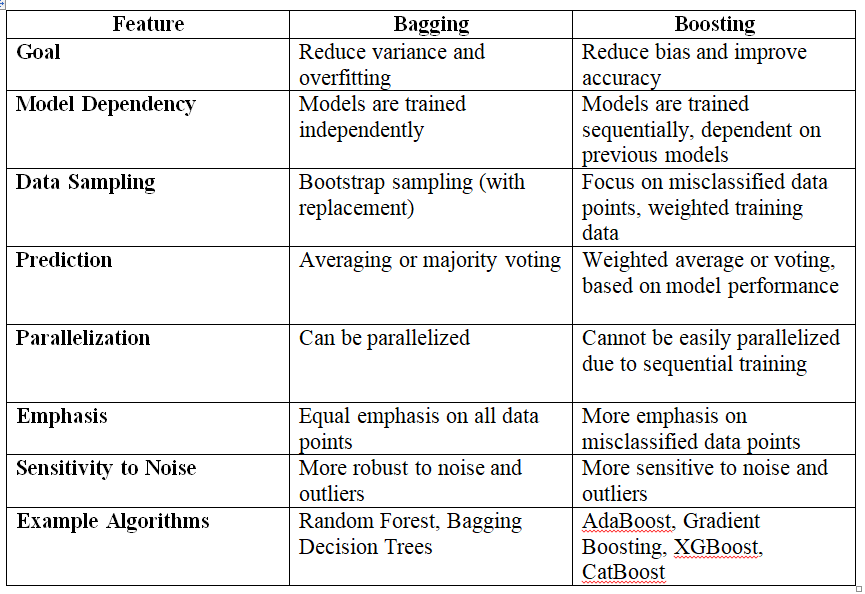

PRACTICAL QUESTIONS

**Question No21:** Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

**Answer:**

In [5]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base model (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with Decision Trees as the base estimator
bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 1.0


**Question No22:** Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

**Answer:**

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base model (Decision Tree)
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor with Decision Trees as the base estimator
bagging_model = BaggingRegressor(estimator=dt_model, n_estimators=50, random_state=42)

# Train the Bagging Regressor model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.25787382250585034


**Question No23:**  Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

**Answer:**

In [6]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Print the feature importance scores
feature_importances = rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(data.feature_names, feature_importances):
    print(f"{feature}: {importance}")

mean radius: 0.032311888273301004
mean texture: 0.011063901250175845
mean perimeter: 0.060092333477412795
mean area: 0.05381045367561502
mean smoothness: 0.006223358550035776
mean compactness: 0.009215659698391042
mean concavity: 0.08055701642634591
mean concave points: 0.1419344436315119
mean symmetry: 0.003278068988046974
mean fractal dimension: 0.003140276443878005
radius error: 0.016434957577357797
texture error: 0.003171913625550393
perimeter error: 0.011769755537440448
area error: 0.029538418256883636
smoothness error: 0.005880791914760226
compactness error: 0.004596378662668866
concavity error: 0.005815899489496524
concave points error: 0.0033823220710919844
symmetry error: 0.0040007728493448805
fractal dimension error: 0.007134569189458313
worst radius: 0.07797474929691814
worst texture: 0.018785671163890155
worst perimeter: 0.07429212194132524
worst area: 0.11821685833472201
worst smoothness: 0.011769174205977244
worst compactness: 0.017539085585610643
worst concavity: 0.04107

**Question No24:** Train a Random Forest Regressor and compare its performance with a single Decision Tree?

**Answer:**

In [7]:
# Importing necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Decision Tree Regressor
dt_model.fit(X_train, y_train)

# Train the Random Forest Regressor
rf_model.fit(X_train, y_train)

# Make predictions with the Decision Tree model
dt_pred = dt_model.predict(X_test)

# Make predictions with the Random Forest model
rf_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

# Calculate R^2 Score for both models
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Decision Tree Regressor - MSE: {dt_mse:.4f}, R^2: {dt_r2:.4f}")
print(f"Random Forest Regressor - MSE: {rf_mse:.4f}, R^2: {rf_r2:.4f}")

Decision Tree Regressor - MSE: 0.5280, R^2: 0.5977
Random Forest Regressor - MSE: 0.2565, R^2: 0.8046


**Question No25:** Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

**Answer:**

In [8]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier with OOB score enabled
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Train the Random Forest Classifier model
rf_model.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_model.oob_score_

# Print the OOB score
print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

Out-of-Bag (OOB) Score: 0.9429


**Question No26:** Train a Bagging Classifier using SVM as a base estimator and print accuracy?

**Answer:**

In [9]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base model (Support Vector Machine - SVM)
svm_model = SVC(random_state=42)

# Initialize the Bagging Classifier with SVM as the base estimator
bagging_model = BaggingClassifier(estimator=svm_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 1.0000


**Question No27:** Train a Random Forest Classifier with different numbers of trees and compare accuracy

**Answer:**

Random Forest with 10 trees - Accuracy: 1.0000
Random Forest with 50 trees - Accuracy: 1.0000
Random Forest with 100 trees - Accuracy: 1.0000
Random Forest with 200 trees - Accuracy: 1.0000
Random Forest with 500 trees - Accuracy: 1.0000


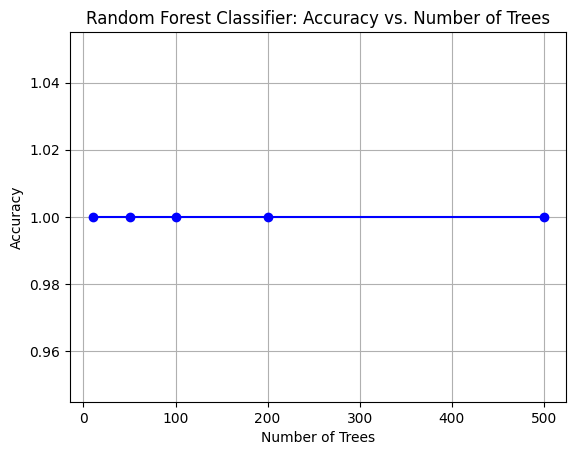

In [10]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different numbers of trees to experiment with
n_trees = [10, 50, 100, 200, 500]

# List to store accuracy scores for each model
accuracy_scores = []

# Train Random Forest Classifiers with different numbers of trees
for n in n_trees:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Random Forest with {n} trees - Accuracy: {accuracy:.4f}")

# Plotting the accuracy for different numbers of trees
plt.plot(n_trees, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Random Forest Classifier: Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**Question No28:** Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

**Answer:**

In [18]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the features to improve convergence in Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the base model (Logistic Regression) with a higher number of iterations
lr_model = LogisticRegression(max_iter=5000, random_state=42)

# Initialize the Bagging Classifier with Logistic Regression as the base estimator
bagging_model = BaggingClassifier(estimator=lr_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier model
bagging_model.fit(X_train, y_train)

# Make predictions on the test set (probability estimates are required for AUC)
y_pred_prob = bagging_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9982


**Question No29:** Train a Random Forest Regressor and analyze feature importance scores.

**Answer:**

MedInc: 0.5260
HouseAge: 0.0547
AveRooms: 0.0472
AveBedrms: 0.0300
Population: 0.0317
AveOccup: 0.1382
Latitude: 0.0861
Longitude: 0.0861


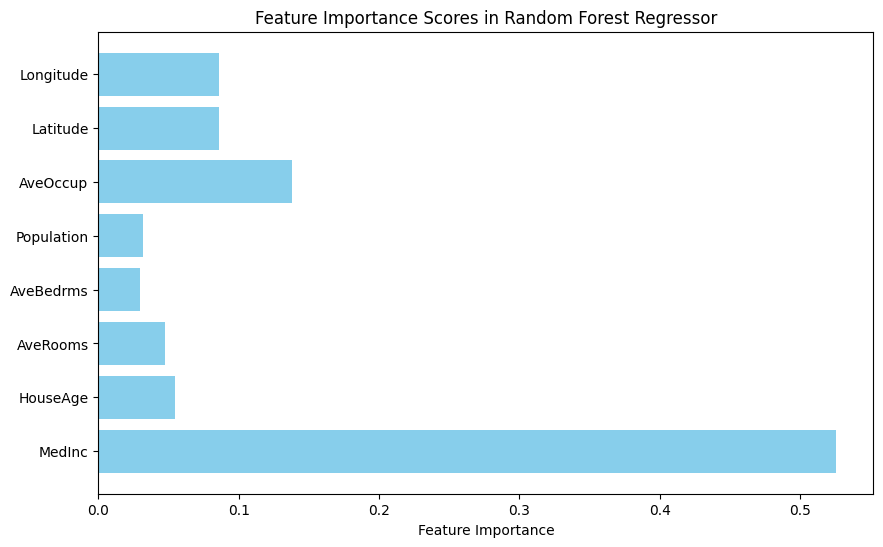

In [19]:
# Importing necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (median house value)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Get the feature importance scores
feature_importances = rf_model.feature_importances_

# Print feature importance scores
for feature, importance in zip(data.feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores in Random Forest Regressor')
plt.show()

**Question No30:**  Train an ensemble model using both Bagging and Random Forest and compare accuracy.

**Answer:**

In [21]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base model (Decision Tree Classifier)
dt_model = DecisionTreeClassifier(random_state=42)

# 1. Train a Bagging Classifier (use 'estimator' instead of 'base_estimator')
bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# 2. Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Make predictions with both models
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 4. Calculate accuracy for both models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy results
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

Accuracy of Bagging Classifier: 1.0000
Accuracy of Random Forest Classifier: 1.0000


**Question No31:** Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

**Answer:**

In [23]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for splits
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Train the model using GridSearchCV to tune the hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculate and print accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best Random Forest model: {accuracy:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the best Random Forest model: 1.0000


**Question No32:** Train a Bagging Regressor with different numbers of base estimators and compare performance

**Answer:**

TypeError: 'bool' object is not callable

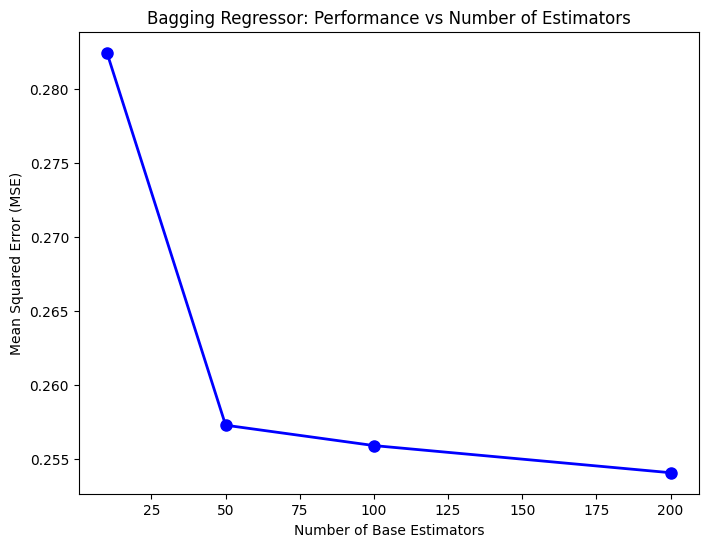

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor (Base Estimator)
base_estimator = DecisionTreeRegressor(random_state=42)

# Define different numbers of base estimators to test
n_estimators_list = [10, 50, 100, 200]

# Initialize a list to store the results
mse_scores = []

# Train and evaluate the Bagging Regressor with different numbers of estimators
for n_estimators in n_estimators_list:
    # Initialize the Bagging Regressor (use estimator, not base_estimator)
    bagging_model = BaggingRegressor(estimator=base_estimator,
                                     n_estimators=n_estimators,
                                     random_state=42)

    # Train the model
    bagging_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_model.predict(X_test)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot the MSE scores against the number of estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, mse_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Bagging Regressor: Performance vs Number of Estimators')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Mean Squared Error (MSE)')

# Fix the grid issue
plt.grid(True)

# Display the plot
plt.show()

# Print the results
for n_estimators, mse in zip(n_estimators_list, mse_scores):
    print(f"Number of Estimators: {n_estimators}, MSE: {mse:.4f}")

**Question No33:** Train a Random Forest Classifier and analyze misclassified samples

**Answer:**

Accuracy of the Random Forest Classifier: 1.0000

Misclassified Samples:


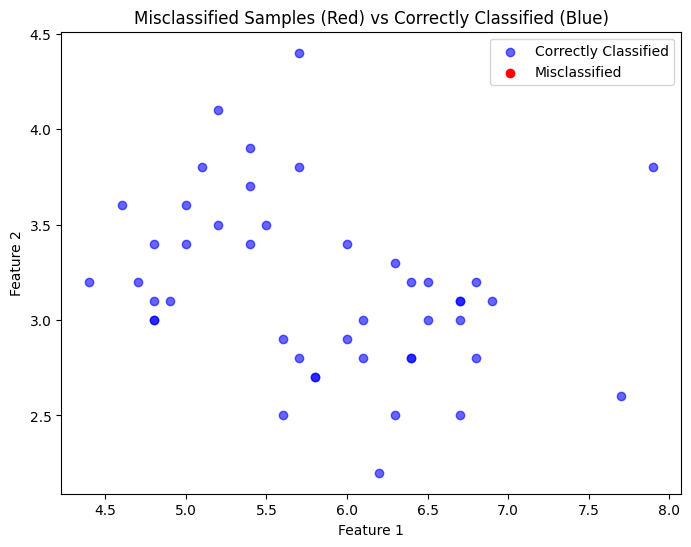

In [27]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.4f}")

# Identify the misclassified samples
misclassified_indexes = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indexes]
misclassified_true_labels = y_test[misclassified_indexes]
misclassified_pred_labels = y_pred[misclassified_indexes]

# Print out the misclassified samples and their true/predicted labels
print("\nMisclassified Samples:")
for i in range(len(misclassified_samples)):
    print(f"Sample {misclassified_samples[i]} - True Label: {misclassified_true_labels[i]}, Predicted Label: {misclassified_pred_labels[i]}")

# Optionally, plot the misclassified samples (for 2D data)
# Here, we'll only plot two features for visualization purposes (e.g., first two features of the Iris dataset)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', label='Correctly Classified', alpha=0.6)
plt.scatter(misclassified_samples[:, 0], misclassified_samples[:, 1], c='red', label='Misclassified', alpha=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Misclassified Samples (Red) vs Correctly Classified (Blue)')
plt.legend()
plt.show()

**Question No34:** Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

**Answer:**

Accuracy of Decision Tree Classifier: 1.0000
Accuracy of Bagging Classifier: 1.0000


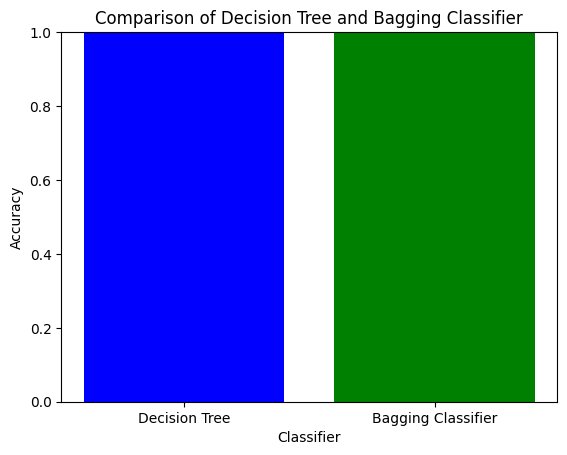

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# 2. Train a Bagging Classifier with Decision Trees as base estimators
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# Print the accuracies of both models
print(f"Accuracy of Decision Tree Classifier: {dt_accuracy:.4f}")
print(f"Accuracy of Bagging Classifier: {bagging_accuracy:.4f}")

# Plot a bar chart to compare the performance
labels = ['Decision Tree', 'Bagging Classifier']
accuracies = [dt_accuracy, bagging_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree and Bagging Classifier')
plt.ylim([0, 1])
plt.show()

**Question No35:** Train a Random Forest Classifier and visualize the confusion matrix.

**Answer:**

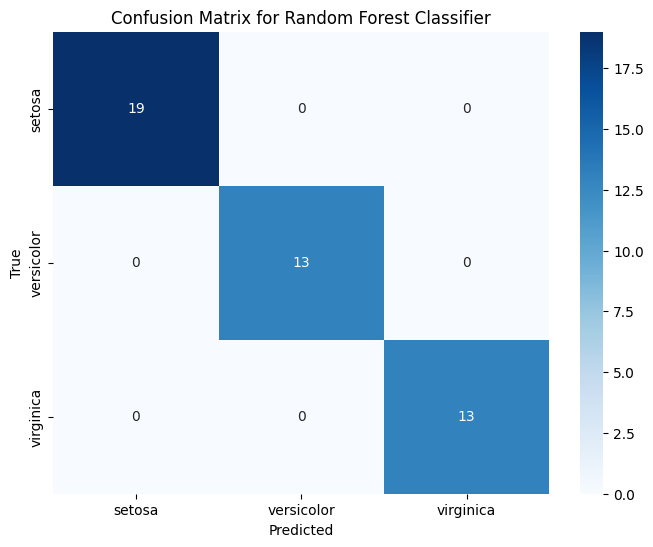

In [30]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Question No36:** Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

**Answer:**

In [31]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base classifiers
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # SVM with probability estimates
logreg_model = LogisticRegression(max_iter=200, random_state=42)

# Define the stacking classifier with the base classifiers
stacking_model = StackingClassifier(
    estimators=[('decision_tree', dt_model), ('svm', svm_model), ('logreg', logreg_model)],
    final_estimator=LogisticRegression(random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the accuracy of the stacking model
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)

# Evaluate the accuracy of each base model
y_pred_dt = dt_model.fit(X_train, y_train).predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

y_pred_svm = svm_model.fit(X_train, y_train).predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

y_pred_logreg = logreg_model.fit(X_train, y_train).predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Print the accuracy of the base models and the stacking classifier
print(f"Accuracy of Decision Tree: {dt_accuracy:.4f}")
print(f"Accuracy of SVM: {svm_accuracy:.4f}")
print(f"Accuracy of Logistic Regression: {logreg_accuracy:.4f}")
print(f"Accuracy of Stacking Classifier: {stacking_accuracy:.4f}")

Accuracy of Decision Tree: 1.0000
Accuracy of SVM: 1.0000
Accuracy of Logistic Regression: 1.0000
Accuracy of Stacking Classifier: 1.0000


**Question No37:** Train a Random Forest Classifier and print the top 5 most important features.

**Answer:**

In [32]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Create a DataFrame for easy visualization
feature_names = data.feature_names
X_df = pd.DataFrame(X, columns=feature_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))

Top 5 Most Important Features:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


**Question No38:** Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

**Answer:**

In [34]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Classifier with Decision Trees as base estimators (corrected argument)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


**Question No39:** Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

**Answer:**

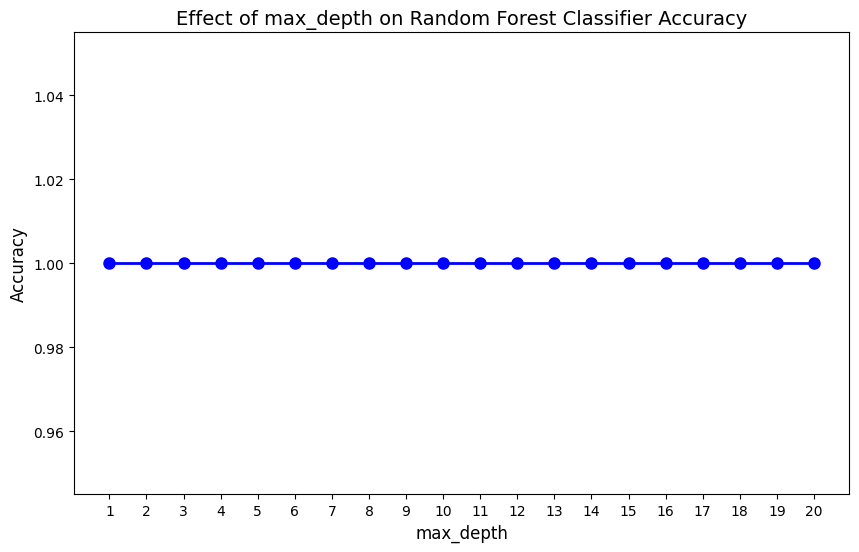

max_depth=1: Accuracy=1.0000
max_depth=2: Accuracy=1.0000
max_depth=3: Accuracy=1.0000
max_depth=4: Accuracy=1.0000
max_depth=5: Accuracy=1.0000
max_depth=6: Accuracy=1.0000
max_depth=7: Accuracy=1.0000
max_depth=8: Accuracy=1.0000
max_depth=9: Accuracy=1.0000
max_depth=10: Accuracy=1.0000
max_depth=11: Accuracy=1.0000
max_depth=12: Accuracy=1.0000
max_depth=13: Accuracy=1.0000
max_depth=14: Accuracy=1.0000
max_depth=15: Accuracy=1.0000
max_depth=16: Accuracy=1.0000
max_depth=17: Accuracy=1.0000
max_depth=18: Accuracy=1.0000
max_depth=19: Accuracy=1.0000
max_depth=20: Accuracy=1.0000


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store results
max_depth_values = list(range(1, 21))  # Exploring max_depth from 1 to 20
accuracies = []

# Train a Random Forest Classifier for each max_depth value and record the accuracy
for depth in max_depth_values:
    rf_model = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)  # Train the model
    y_pred = rf_model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)

# Plot the effect of max_depth on accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title("Effect of max_depth on Random Forest Classifier Accuracy", fontsize=14)
plt.xlabel("max_depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(max_depth_values)

# Ensure plt.grid is callable and not overridden
if callable(plt.grid):
    plt.grid(True)  # Add grid lines to the plot

plt.show()

# Print the results
for depth, acc in zip(max_depth_values, accuracies):
    print(f"max_depth={depth}: Accuracy={acc:.4f}")

**Question No40:** Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

**Answer:**

Mean Squared Error (Bagging with Decision Tree): 0.2573
Mean Squared Error (Bagging with KNN): 1.0763


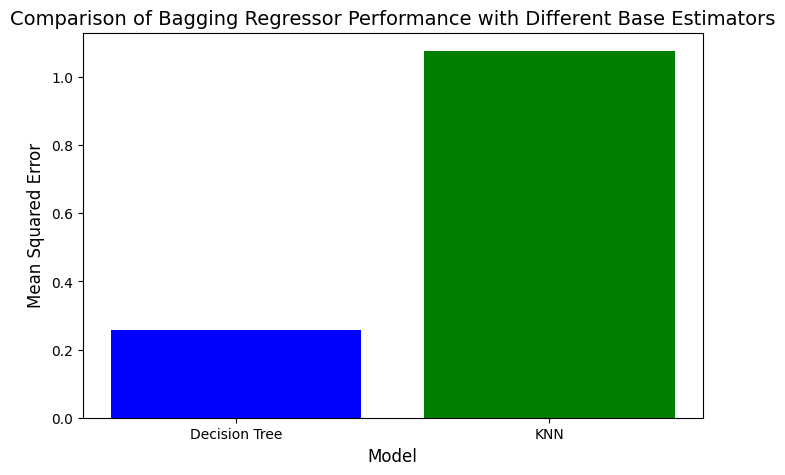

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimators
dt_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor()

# Initialize the Bagging Regressor with Decision Tree and KNN
bagging_dt = BaggingRegressor(estimator=dt_model, n_estimators=50, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn_model, n_estimators=50, random_state=42)

# Train the models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Make predictions
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print the MSE values for both models
print(f"Mean Squared Error (Bagging with Decision Tree): {mse_dt:.4f}")
print(f"Mean Squared Error (Bagging with KNN): {mse_knn:.4f}")

# Visualize the comparison between the models
models = ['Decision Tree', 'KNN']
mse_values = [mse_dt, mse_knn]

plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Comparison of Bagging Regressor Performance with Different Base Estimators', fontsize=14)
plt.show()

**Question No41:** Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

**Answer:**

ROC-AUC Scores:
Class 0: 1.0000
Class 1: 1.0000
Class 2: 1.0000


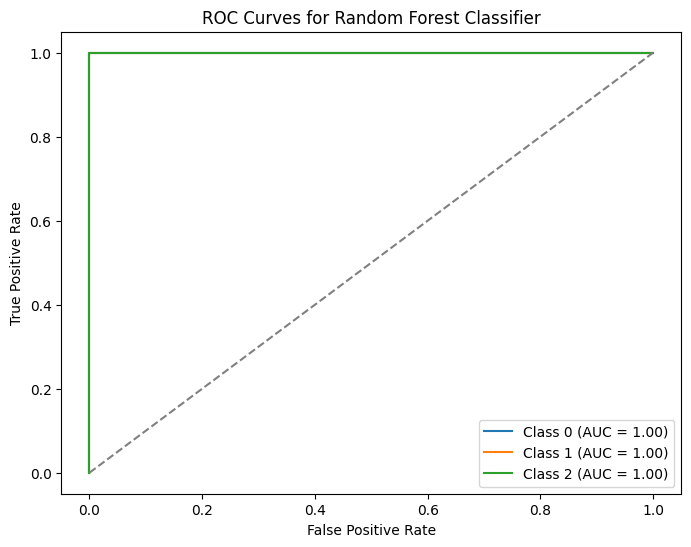

In [41]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output for multi-class ROC-AUC
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = rf_model.predict_proba(X_test)

# Compute ROC-AUC score for each class
roc_auc = {}
for i in range(y_bin.shape[1]):
    roc_auc[i] = roc_auc_score(y_test[:, i], y_prob[i][:, 1])

# Print the ROC-AUC scores for each class
print("ROC-AUC Scores:")
for class_idx in range(y_bin.shape[1]):
    print(f"Class {class_idx}: {roc_auc[class_idx]:.4f}")

# Plot ROC Curves for each class
plt.figure(figsize=(8, 6))
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[i][:, 1])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

**Question No42:** Train a Bagging Classifier and evaluate its performance using cross-validation.

**Answer:**

In [43]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the Bagging Classifier without specifying base_estimator (it defaults to DecisionTreeClassifier)
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667
Standard deviation of accuracy: 0.0211


**Question No43:** Train a Random Forest Classifier and plot the Precision-Recall curve.

**Answer:**

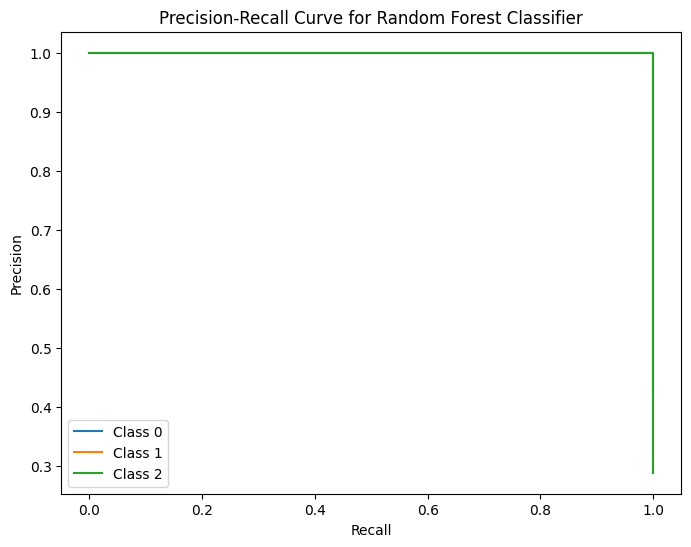

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output labels for multi-class classification (optional)
y_bin = label_binarize(y, classes=[0, 1, 2])  # Three classes: 0, 1, 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get predictions for the test set (probabilities)
y_probs = rf_model.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_probs[i][:, 1])
    plt.plot(recall, precision, label=f'Class {i}')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc='best')

# Show the plot
plt.show()

**Question No44:** Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

**Answer:**

In [49]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the Stacking Classifier with Random Forest and Logistic Regression as base models
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('log_reg', log_reg_model)],
    final_estimator=LogisticRegression(),  # Meta model
)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the accuracy of the Stacking Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Classifier: {accuracy:.4f}')

Accuracy of Stacking Classifier: 1.0000


**Question No45:** Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

**Answer:**

TypeError: 'bool' object is not callable

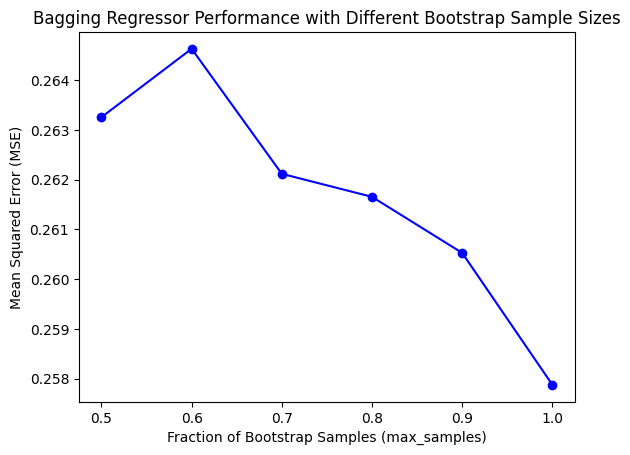

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
data = fetch_california_housing()

# Split the data into features (X) and target (y)
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different max_samples values to experiment with
max_samples_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
mse_values = []

# Train Bagging Regressor with different levels of bootstrap samples
for max_samples in max_samples_values:
    # Directly use the default base estimator (DecisionTreeRegressor)
    bagging_model = BaggingRegressor(n_estimators=50,
                                    max_samples=max_samples,
                                    random_state=42)
    bagging_model.fit(X_train, y_train)

    # Predict and calculate the Mean Squared Error
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the results
plt.plot(max_samples_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('Bagging Regressor Performance with Different Bootstrap Sample Sizes')
plt.xlabel('Fraction of Bootstrap Samples (max_samples)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)  # Ensure that this line works now
plt.show()

# Print the results
for max_samples, mse in zip(max_samples_values, mse_values):
    print(f'Max Samples: {max_samples}, MSE: {mse:.4f}')